In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


## Data Collection, Analysis and processing

In [275]:
automobile_df = pd.read_csv('Automobile_data.csv')

In [276]:
automobile_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [277]:
automobile_df.shape

(205, 26)

In [278]:
# statistical measures
automobile_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [279]:
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [280]:

# List of all the numerical column
numerical_data =['normalized-losses','wheel-base', 'length', 'width', 'height', 
                 'curb-weight', 'engine-size', 'bore', 'stroke',
                 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
                 'highway-mpg', 'price']
print(numerical_data)

len(numerical_data)

['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


15

In [281]:
# List of categorical coloumns
categorical_data= list(set(automobile_df.columns) - set(numerical_data)) 
# index column not included 
print(categorical_data)
len(categorical_data)

['engine-location', 'num-of-cylinders', 'num-of-doors', 'symboling', 'body-style', 'fuel-system', 'make', 'fuel-type', 'aspiration', 'drive-wheels', 'engine-type']


11

In [282]:
# Functiom to understand each feature
def uniq(df):
    
    df = pd.DataFrame([[i, sorted(df[i].unique(), reverse = True), df[i].dtype,
                        len(df[i].unique())] for i in df.columns], 
                      columns = ['feature', 'values', 'types', 'length'])
    return df

In [283]:
uniq(automobile_df)

,feature,values,types,length
0,symboling,"[3, 2, 1, 0, -1, -2]",int64,6
1,normalized-losses,"[?, 98, 95, 94, 93, 91, 90, 89, 87, 85, 83, 81...",object,52
2,make,"[volvo, volkswagen, toyota, subaru, saab, rena...",object,22
3,fuel-type,"[gas, diesel]",object,2
4,aspiration,"[turbo, std]",object,2
5,num-of-doors,"[two, four, ?]",object,3
6,body-style,"[wagon, sedan, hatchback, hardtop, convertible]",object,5
7,drive-wheels,"[rwd, fwd, 4wd]",object,3
8,engine-location,"[rear, front]",object,2
9,wheel-base,"[120.9, 115.6, 114.2, 113.0, 112.0, 110.0, 109...",float64,53


-- There is "?" symbol in columns normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm and price which we can treat as NULL values

In [284]:
# Convert all the numerical column to int or float
for data in numerical_data:
    
    automobile_df[data] = pd.to_numeric(automobile_df[data], errors = 'coerce') 
    # for errors = 'coerce' invalid parsing will be set as NaN.
    
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [285]:
automobile_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [286]:
automobile_df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Handling the missing value

In [287]:
# Handling the missing value for the numeric columns except price
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']:
    mean_value = automobile_df[col].mean()
    # replacing the missing value with the mean of the column
    automobile_df[col].replace(np.nan, mean_value, inplace =True) 
    print(mean_value)
automobile_df.isnull().sum()

122.0
3.3297512437810943
3.255422885572139
104.25615763546799
5125.369458128079


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [288]:
# Drop the rows in which price data is missing
automobile_df.dropna(axis = 0, inplace =True)

#reset the index 
automobile_df.reset_index(drop = True, inplace=True)
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [289]:
# "?" in categorical column
automobile_df[automobile_df['num-of-doors']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148.0,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
60,0,122.0,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [290]:
# replace the '?' with the mode of the column number of doors
mm = automobile_df['num-of-doors'].mode()
mm[0]
automobile_df['num-of-doors'].replace("?", mm[0], inplace=True)

In [291]:
automobile_df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [292]:
# Correlation 
corr = automobile_df[numerical_data].corr()

<Axes: >

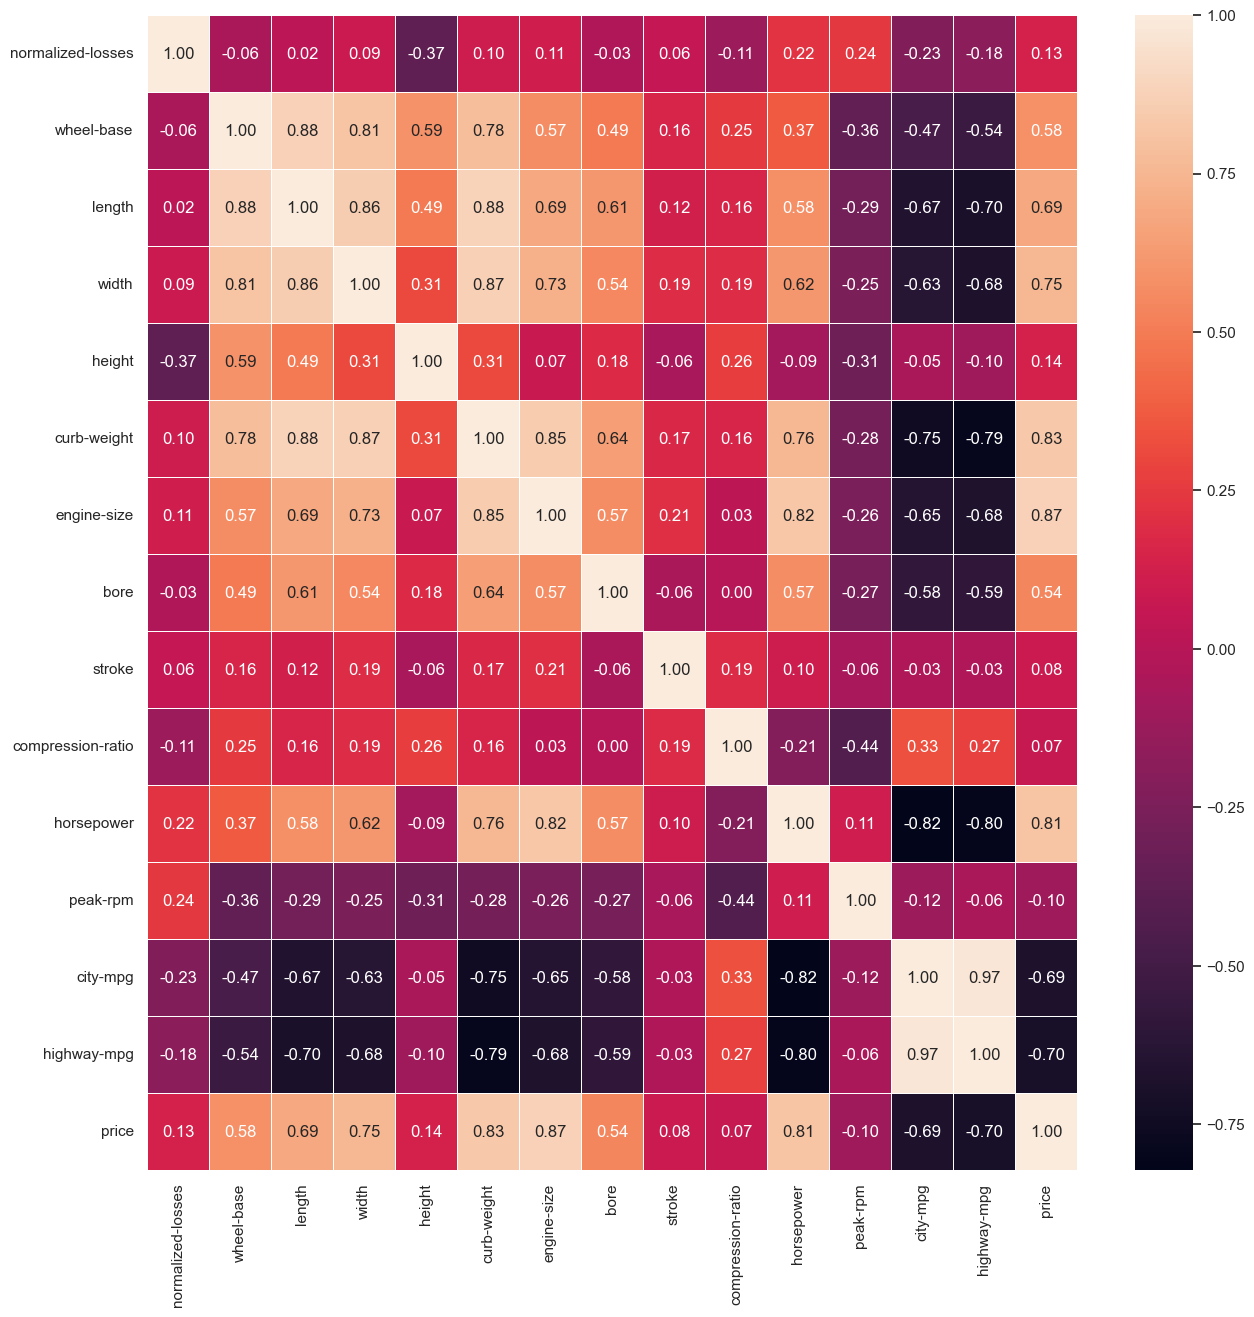

In [293]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cbar=True,linewidth=.5, fmt=".2f")

## Data Visualization

(array([81., 45., 35., 17.,  6.,  3.,  4.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <BarContainer object of 10 artists>)

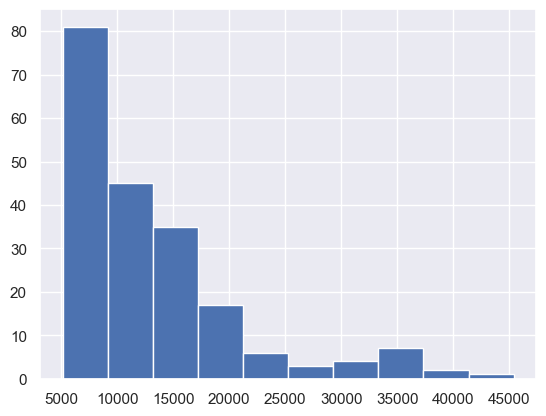

In [294]:
plt.hist(x = 'price', data = automobile_df)

#### The graph can be seen as left skewed to convert it to normal distribution we can use log function

In [295]:
# log1p method takes one parameter and returns the logarithm of the (number+1), i.e log(1+parameter)
# Update the main dataframe with the new log value of price
automobile_df['price'] = np.log1p(automobile_df['price']) 

In [296]:
automobile_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,9.510149
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,9.711176
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,9.711176
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,9.543306
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,9.767152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,9.731869
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,9.854612
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,9.975157
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,10.019981


(array([15., 41., 35., 28., 21., 34.,  8.,  5.,  9.,  5.]),
 array([ 8.54071439,  8.75897189,  8.97722939,  9.19548689,  9.4137444 ,
         9.6320019 ,  9.8502594 , 10.0685169 , 10.28677441, 10.50503191,
        10.72328941]),
 <BarContainer object of 10 artists>)

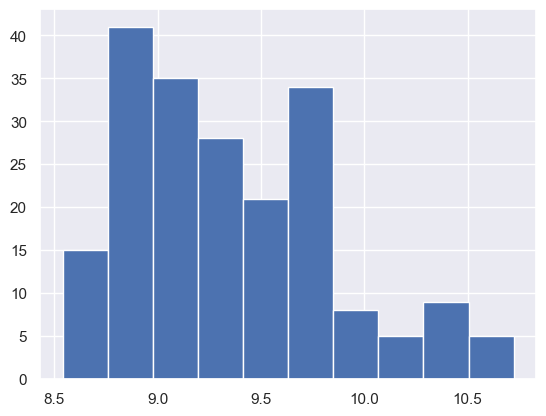

In [297]:
plt.hist(x = 'price', data = automobile_df)

-- Now we can see the histogram is close to Normal Distribution

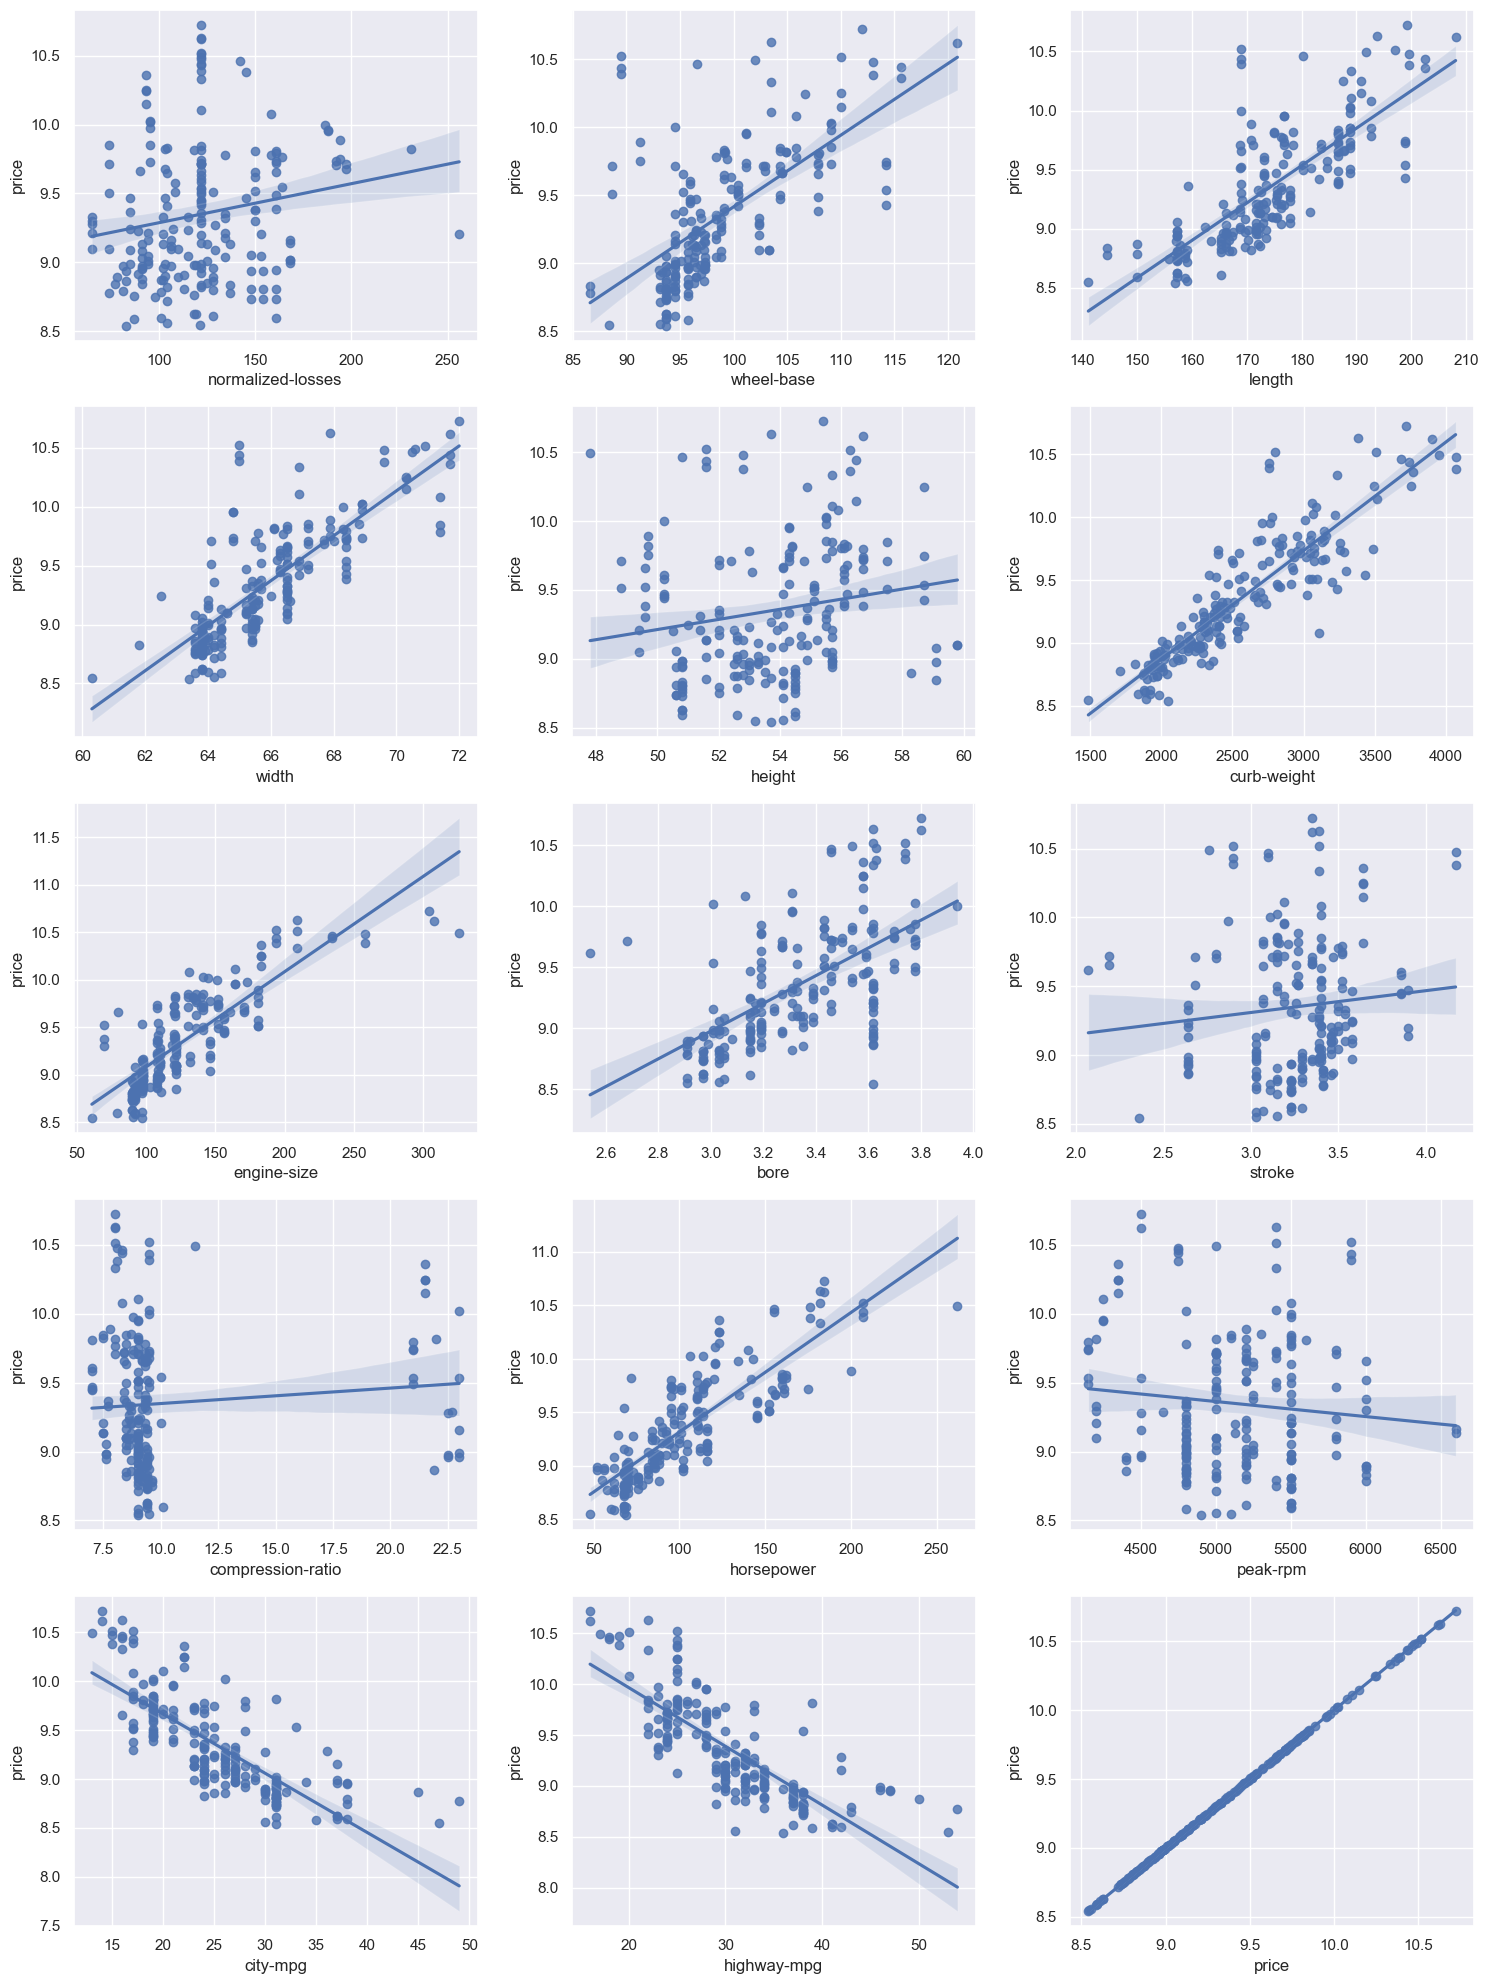

In [298]:
# comparistion of all numerical column with price column
fig, plot = plt.subplots(5, 3, figsize = (15, 20))

for index, feature in enumerate(numerical_data):
    row = index//3 # row index for the subplot
    col = index%3 # column index for the subplot
    sns.regplot(x = feature, y = 'price', data = automobile_df, ax = plot[row, col])
    
plt.tight_layout() # Adjust subplot spacing


-- Inference: We can see that 'city-mpg' and 'highway-mpg' has a negative relation with the price i.e as the price increses there value is decreasing

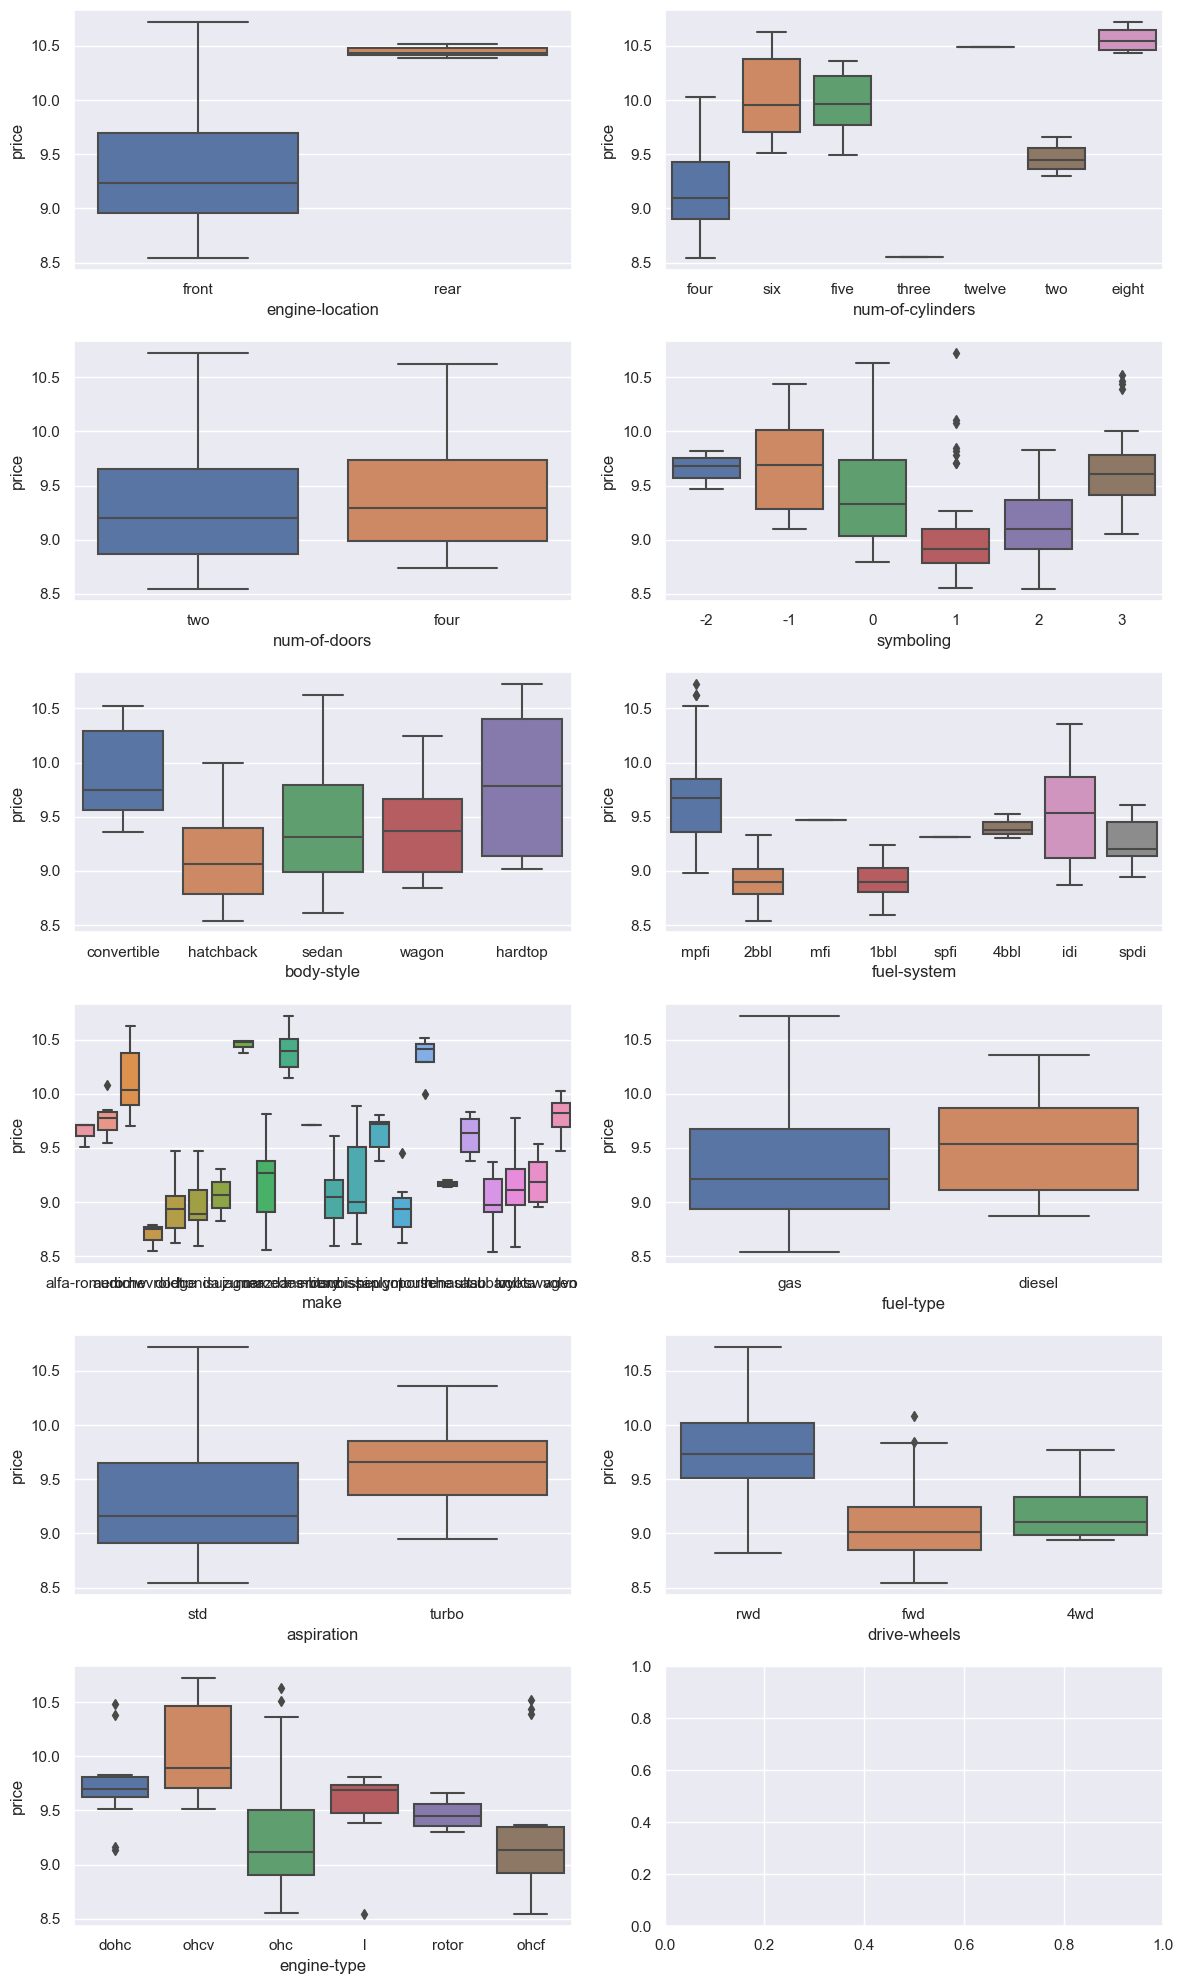

In [299]:
# Comparing the categorical column with price column
fig, plot = plt.subplots(6,2, figsize = (12, 20))

for index, feature in enumerate(categorical_data):
    row = index//2 # row index for the subplot
    col = index%2 # column index for the subplot
    sns.boxplot(x = feature, y = 'price', data = automobile_df, ax = plot[row, col])
    
plt.tight_layout() # Adjust subplot spacing



C:\Users\subit\AppData\Local\Temp\ipykernel_31404\3435056514.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'price', data = automobile_df, hue=feature,
C:\Users\subit\AppData\Local\Temp\ipykernel_31404\3435056514.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'price', data = automobile_df, hue=feature,
C:\Users\subit\AppData\Local\Temp\ipykernel_31404\3435056514.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'price', data = automobile_df, hue=feature,
C:\Users\subit\AppData\Local\Temp\ipykernel_31404\3435056514.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = 'price', data = automobile_df, hue=feature,


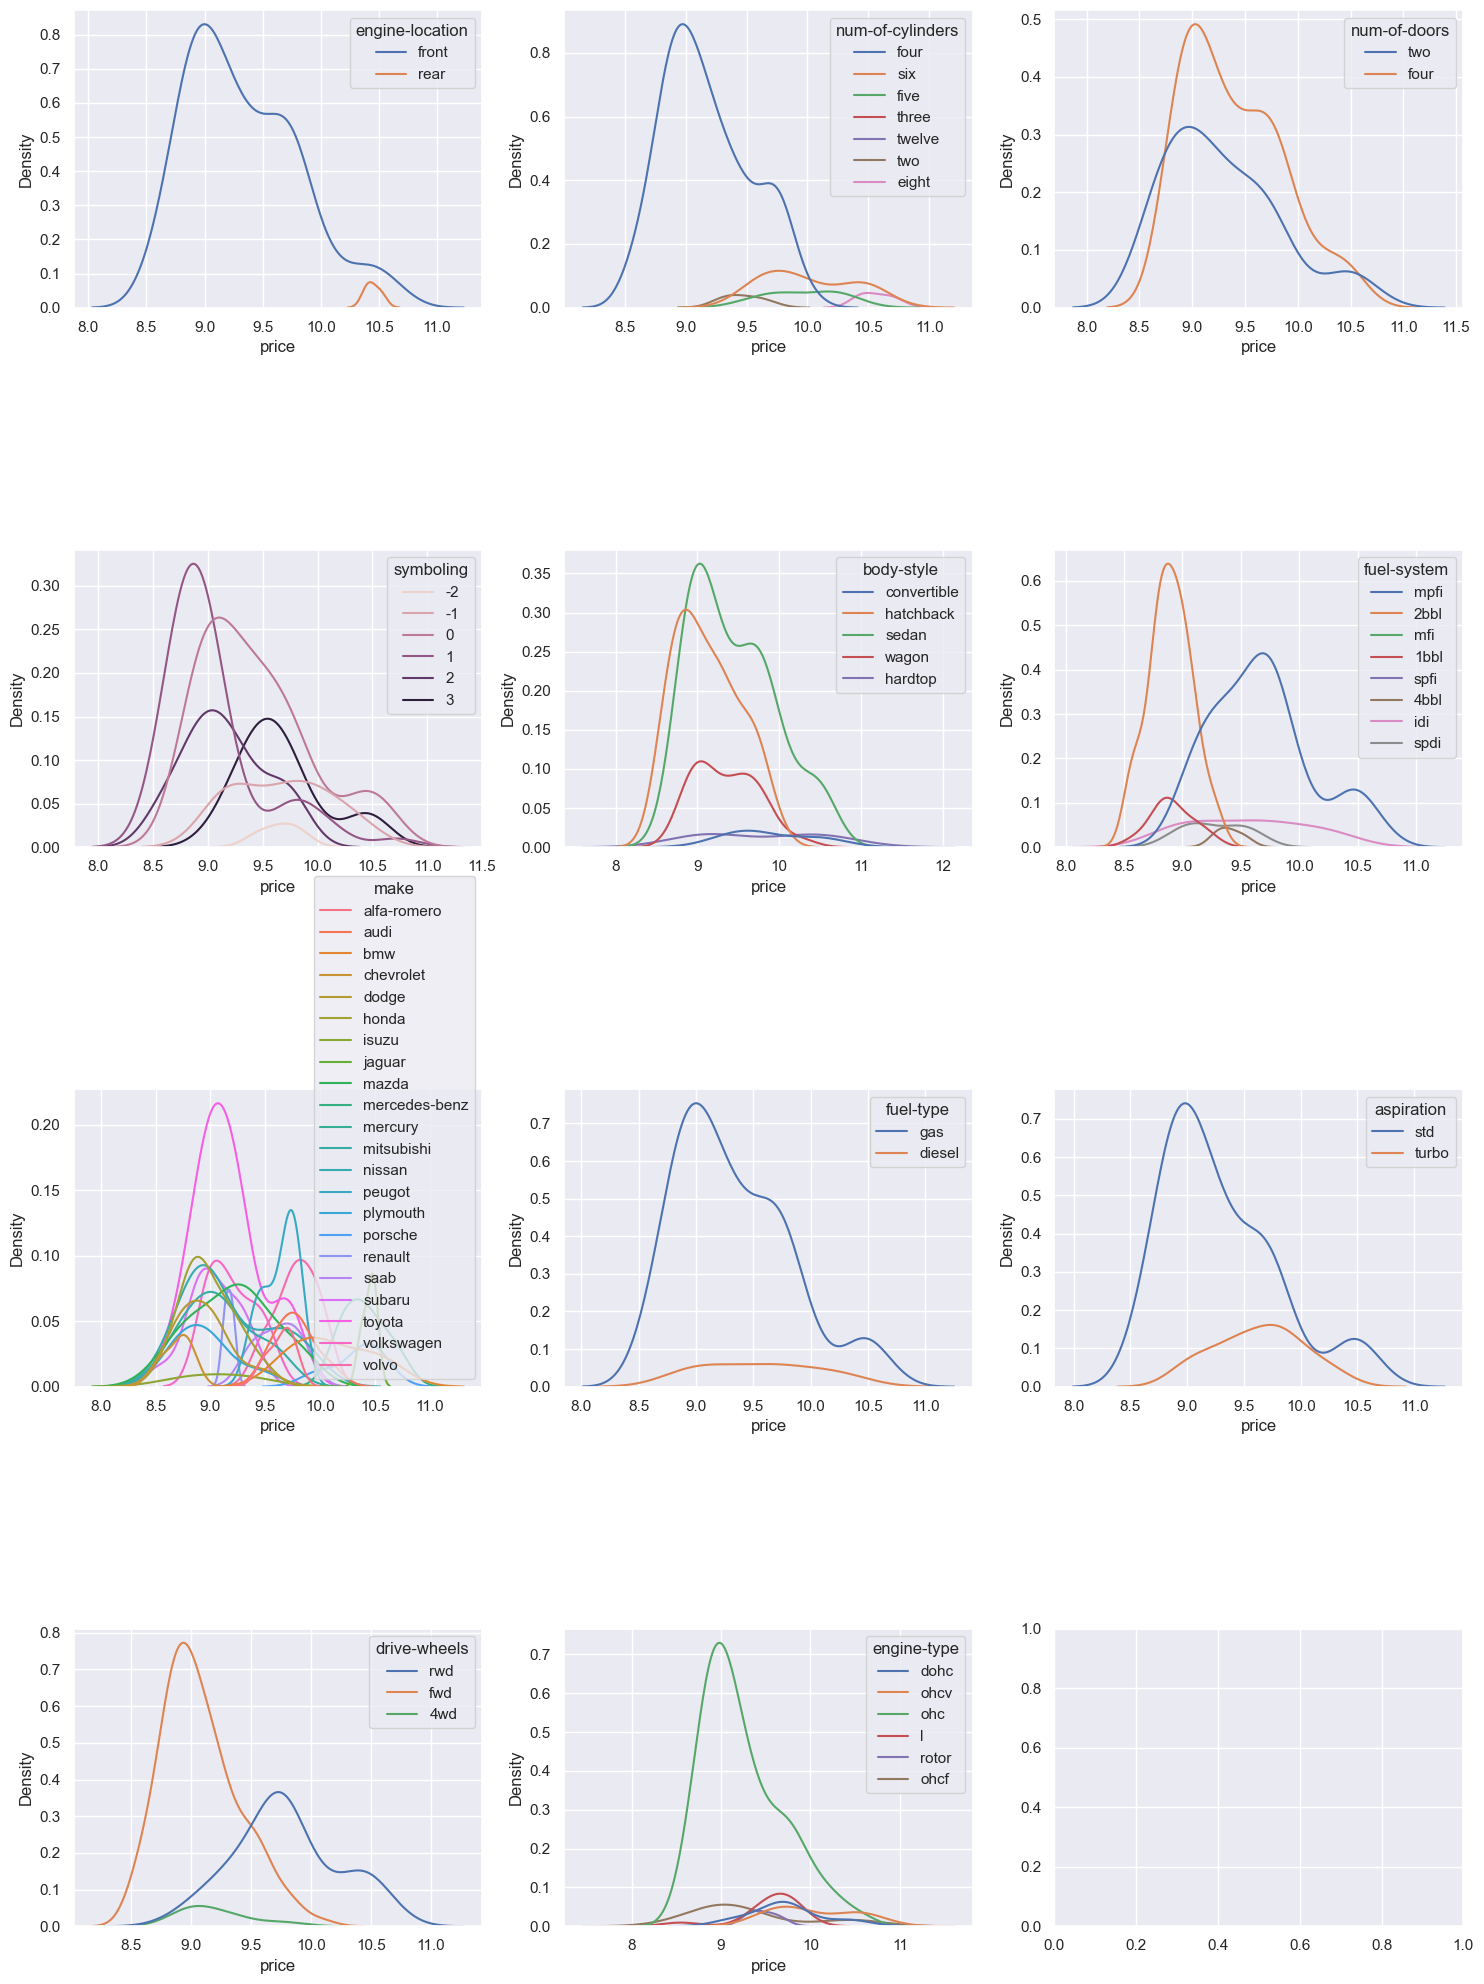

In [300]:
# Comparing the categorical column with price column
fig, plot = plt.subplots(4, 3, figsize = (15, 20))

for index, feature in enumerate(categorical_data):
    row = index//3 # row index for the subplot
    col = index%3 # column index for the subplot
    sns.kdeplot(x = 'price', data = automobile_df, hue=feature,
                ax = plot[row, col])
    
plt.tight_layout() # Adjust subplot spacing



## Data Processing

In [301]:
# Convert the categorical text data
encode_auto_df = pd.get_dummies(automobile_df)

In [302]:
encode_auto_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
197,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
198,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [303]:
# Split the data into features and target
X = encode_auto_df.drop("price", axis =1)
Y = encode_auto_df['price']

## Model Building and Evaluation

In [304]:
# Split the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=22)

In [305]:
X.shape, X_train.shape,X_test.shape

((201, 74), (160, 74), (41, 74))

### Model: Linear regression

In [306]:
model_lr = LinearRegression()

In [307]:
model_lr.fit(X_train, Y_train)

LinearRegression()

In [308]:
# Model EValuation for Training data
predict_train = model_lr.predict(X_train)
accuracy_train = r2_score(Y_train, predict_train)
print("Accuracy score for training set: ",accuracy_train)


Accuracy score for training set:  0.9714588450225944


In [309]:
# Model EValuation for Test data
predict_test = model_lr.predict(X_test)
accuracy_test = r2_score(Y_test, predict_test)
print("Accuracy score for test set: ",accuracy_test)


Accuracy score for test set:  0.9441825305802949


### Model: Lassor Regression

In [310]:
model_la = Lasso() 

In [311]:
model_la.fit(X_train, Y_train)

Lasso()

In [312]:
# Model EValuation for Training data
predict_trainla = model_la.predict(X_train)
accuracy_trainla = r2_score(Y_train, predict_trainla)
print("Accuracy score for training set: ",accuracy_trainla)

Accuracy score for training set:  0.8656167362348549


In [313]:
# Model EValuation for Test data
predict_testla = model_la.predict(X_test)
accuracy_testla = r2_score(Y_test, predict_testla)
print("Accuracy score for test set: ",accuracy_testla)


Accuracy score for test set:  0.7615021426228008


### Model: Random Forest Regressor

In [314]:
model_rfr = RandomForestRegressor()

In [315]:
model_rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [316]:
# Model EValuation for Training data
predict_train_rfr = model_rfr.predict(X_train)
accuracy_train_rfr = r2_score(Y_train, predict_train_rfr)
print("Accuracy score for training set: ",accuracy_train_rfr)

Accuracy score for training set:  0.9874175501585117


In [317]:
# Model EValuation for Test data
predict_test_rfr = model_rfr.predict(X_test)
accuracy_test_rfr = r2_score(Y_test, predict_test_rfr)
print("Accuracy score for test set: ",accuracy_test_rfr)


Accuracy score for test set:  0.9195192685003634


### Cross Validation 

In [318]:
# List of models
models = [LinearRegression(), Lasso(), RandomForestRegressor()]

In [319]:
def cross_validation():
    
    # Loading one model from the list
    for model in models: 
        
        # getting the cross validation score
        cv_score = cross_val_score(model, X, Y, cv=5)
        print("Cross validation score for ", model," : \n",cv_score)
        accuracy_score = round(((sum(cv_score)/len(cv_score))*100),2)
        print("Mean Cross Validation score for ",model," :\n", accuracy_score)
        print("***********************")
        


In [320]:
cross_validation()

Cross validation score for  LinearRegression()  : 
 [0.64836874 0.91819131 0.14988655 0.38256731 0.3827367 ]
Mean Cross Validation score for  LinearRegression()  :
 49.64
***********************
Cross validation score for  Lasso()  : 
 [0.81093677 0.90822692 0.65741951 0.61364412 0.72149662]
Mean Cross Validation score for  Lasso()  :
 74.23
***********************
Cross validation score for  RandomForestRegressor()  : 
 [0.83920468 0.92334584 0.33500512 0.83512744 0.73035078]
Mean Cross Validation score for  RandomForestRegressor()  :
 73.26
***********************


-- Inference: Best Cross Validation Score is for Lasso Regression